In [1]:
!pip install coloroma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement coloroma (from versions: none)
ERROR: No matching distribution found for coloroma


In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report


In [3]:
#importing dataset
dataset=pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data=dataset
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,12]
features=x.columns.tolist()
print(features)

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


In [4]:
print(x)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
593  62.0        0                        61         1                 38   
594  55.0        0                      1820         0                 38   
595  45.0        0                      2060         1                 60   
596  45.0        0                      2413         0                 38   
597  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [5]:
# age distribution

data =[dataset["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

In [6]:

survival = heart_data[heart_data["DEATH_EVENT"]==0]["age"]
not_survival = heart_data[heart_data["DEATH_EVENT"]==1]["age"]
hist_data = [survival,not_survival]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text=" Age V/S Survival Status")
fig.show()

In [7]:
figure = px.box(dataset, x='sex', y='age', points="all")
figure.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")
figure.show()

In [8]:
fig = px.violin(heart_data, y="age", x="sex", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="Analysis in Age and Gender on Survival Status")
fig.show()

In [9]:
heart_data=dataset
male = heart_data[heart_data["sex"]==1]
female = heart_data[heart_data["sex"]==0]

male_survi = male[heart_data["DEATH_EVENT"]==0]
male_not = male[heart_data["DEATH_EVENT"]==1]
female_survi = female[heart_data["DEATH_EVENT"]==0]
female_not = female[heart_data["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[heart_data["DEATH_EVENT"]==0]),len(male[heart_data["DEATH_EVENT"]==1]),
         len(female[heart_data["DEATH_EVENT"]==0]),len(female[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show()

<ipython-input-9-80a2519e64fa>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-9-80a2519e64fa>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-9-80a2519e64fa>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-9-80a2519e64fa>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-9-80a2519e64fa>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-9-80a2519e64fa>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [10]:
fig = px.histogram(heart_data, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [11]:
fig = px.histogram(heart_data, x="ejection_fraction", color="DEATH_EVENT", marginal=None, hover_data=heart_data.columns)
fig.show()

In [12]:
fig = px.histogram(heart_data, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [13]:
fig = px.histogram(heart_data, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [14]:
fig = px.histogram(heart_data, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=heart_data.columns)
fig.show()

In [15]:
surv = heart_data[heart_data['DEATH_EVENT']==0]['serum_sodium']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['serum_sodium']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Sodium on Survival Status")
fig.show()

In [16]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = heart_data[heart_data['diabetes']==1]
diabetes_no = heart_data[heart_data['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Diabetes")
fig.show()

In [17]:
diabetes_yes_survi = diabetes_yes[heart_data["DEATH_EVENT"]==0]
diabetes_yes_not_survi = diabetes_yes[heart_data["DEATH_EVENT"]==1]
diabetes_no_survi = diabetes_no[heart_data["DEATH_EVENT"]==0]
diabetes__no_not_survi = diabetes_no[heart_data["DEATH_EVENT"]==1]

labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes[heart_data["DEATH_EVENT"]==0]),len(diabetes_yes[heart_data["DEATH_EVENT"]==1]),
         len(diabetes_no[heart_data["DEATH_EVENT"]==0]),len(diabetes_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Diabetes")
fig.show()

<ipython-input-17-fb662ea5dbaf>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-17-fb662ea5dbaf>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-17-fb662ea5dbaf>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-17-fb662ea5dbaf>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-17-fb662ea5dbaf>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-17-fb662ea5dbaf>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [18]:
hbp_yes = heart_data[heart_data['high_blood_pressure']==1]
hbp_no = heart_data[heart_data['high_blood_pressure']==0]

labels = ["No High BP","High BP"]
values = [len(hbp_no), len(hbp_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - High Blood Pressure")
fig.show()

In [19]:
hbp_yes_survi = hbp_yes[heart_data["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[heart_data["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[heart_data["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[heart_data["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[heart_data["DEATH_EVENT"]==0]),len(hbp_yes[heart_data["DEATH_EVENT"]==1]),
         len(hbp_no[heart_data["DEATH_EVENT"]==0]),len(hbp_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - HBP(high blood pressure)")
fig.show()

<ipython-input-19-b94495a2ecae>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-19-b94495a2ecae>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-19-b94495a2ecae>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-19-b94495a2ecae>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-19-b94495a2ecae>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-19-b94495a2ecae>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [20]:
smoking_yes = heart_data[heart_data['smoking']==1]
smoking_no = heart_data[heart_data['smoking']==0]

labels = ['No Smoking','Smoking']
values = [len(smoking_no), len(smoking_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Smoking")
fig.show()

In [21]:
smoking_yes_survi = smoking_yes[heart_data["DEATH_EVENT"]==0]
smoking_yes_not_survi = smoking_yes[heart_data["DEATH_EVENT"]==1]
smoking_no_survi = smoking_no[heart_data["DEATH_EVENT"]==0]
smoking_no_not_survi = smoking_no[heart_data["DEATH_EVENT"]==1]

labels = ['Smoking Yes - Survived','Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking NO- Not Survived']
values = [len(smoking_yes[heart_data["DEATH_EVENT"]==0]),len(smoking_yes[heart_data["DEATH_EVENT"]==1]),
         len(smoking_no[heart_data["DEATH_EVENT"]==0]),len(smoking_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Smoking")
fig.show()

<ipython-input-21-330da006ec57>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-21-330da006ec57>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-21-330da006ec57>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-21-330da006ec57>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-21-330da006ec57>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-21-330da006ec57>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [22]:
# Create a correlation table with pandas
heart_corr = heart_data.corr(method='pearson')

# Set up the correlation plot
fig = go.Figure(go.Heatmap(
  # Set the appropriate x, y and z values
  z=heart_corr.values.tolist(),
  x=heart_corr.columns,
  y=heart_corr.columns,
  # Set the color scale,
  colorscale='rdylgn', 
  # Set min and max values
  zmin=-1, zmax=1))

# Show the plot
fig.show()

In [23]:
# Checking for Type of data 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       598 non-null    float64
 1   anaemia                   598 non-null    int64  
 2   creatinine_phosphokinase  598 non-null    int64  
 3   diabetes                  598 non-null    int64  
 4   ejection_fraction         598 non-null    int64  
 5   high_blood_pressure       598 non-null    int64  
 6   platelets                 598 non-null    float64
 7   serum_creatinine          598 non-null    float64
 8   serum_sodium              598 non-null    int64  
 9   sex                       598 non-null    int64  
 10  smoking                   598 non-null    int64  
 11  time                      598 non-null    int64  
 12  DEATH_EVENT               598 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 60.9 KB


In [24]:
# Checking for NULLs in the data
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [25]:
#splitting data to train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
accuracy_list = []

In [27]:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [28]:

print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  84.17%


In [29]:
#multiple linear regressor
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [30]:
#smothening the predicted result into two classes
for i in range(0,len(y_pred)):
    if y_pred[i]>0.5:
        y_pred[i]=1
    else :
        y_pred[i]=0

In [31]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Figure size 432x288 with 0 Axes>

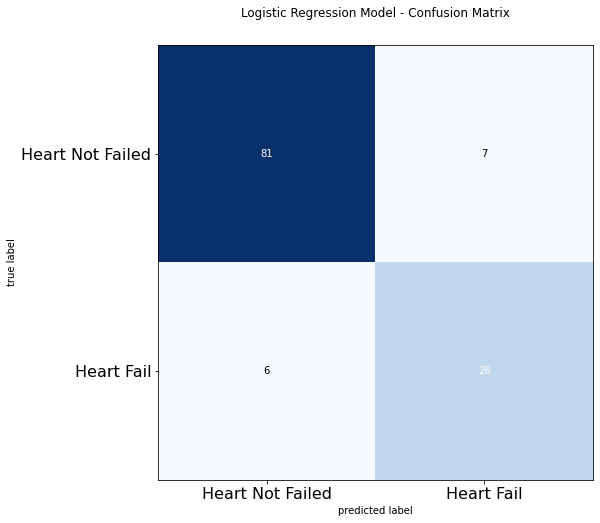

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [33]:
print("accuracy obtained : "+str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])))

accuracy obtained : 0.8916666666666667


In [34]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

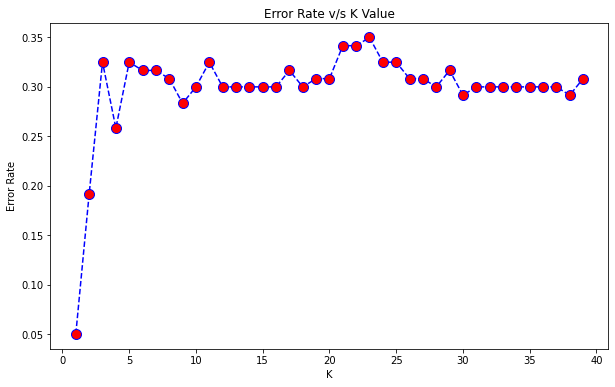

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate v/s K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
# Fitting K-NN to the Training set
accuracy_list = []
kn_clf = KNeighborsClassifier(n_neighbors=2)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)  
accuracy_list.append(100*kn_acc)

<Figure size 432x288 with 0 Axes>

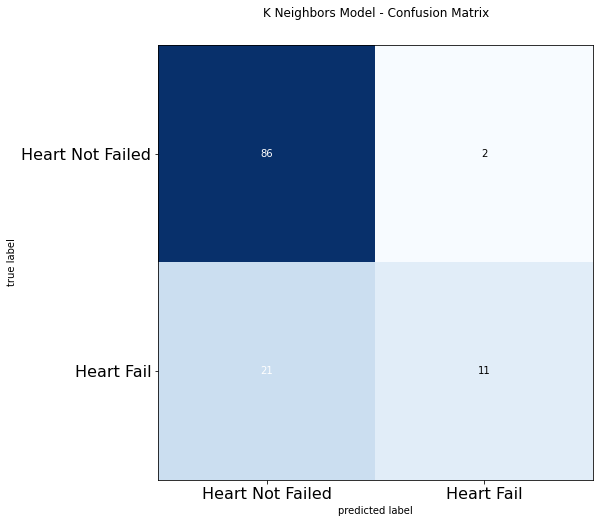

In [37]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [38]:
print("accuracy obtained : "+str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])))

accuracy obtained : 0.8083333333333333


In [39]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 1)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=1)

In [40]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Figure size 432x288 with 0 Axes>

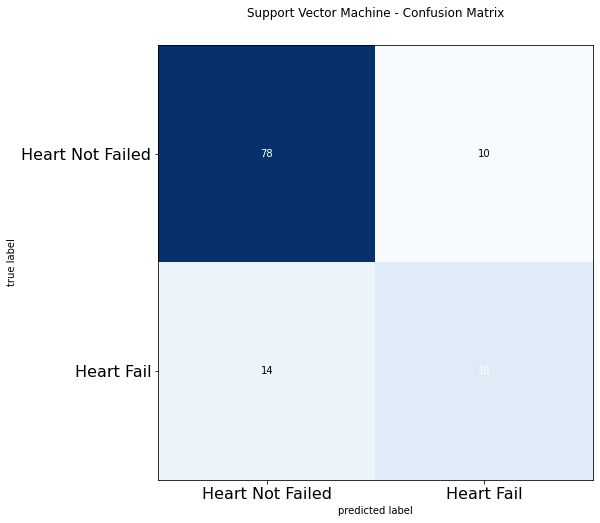

In [42]:
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Support Vector Machine - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [43]:
print("accuracy obtained : "+str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])))

accuracy obtained : 0.8


In [44]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

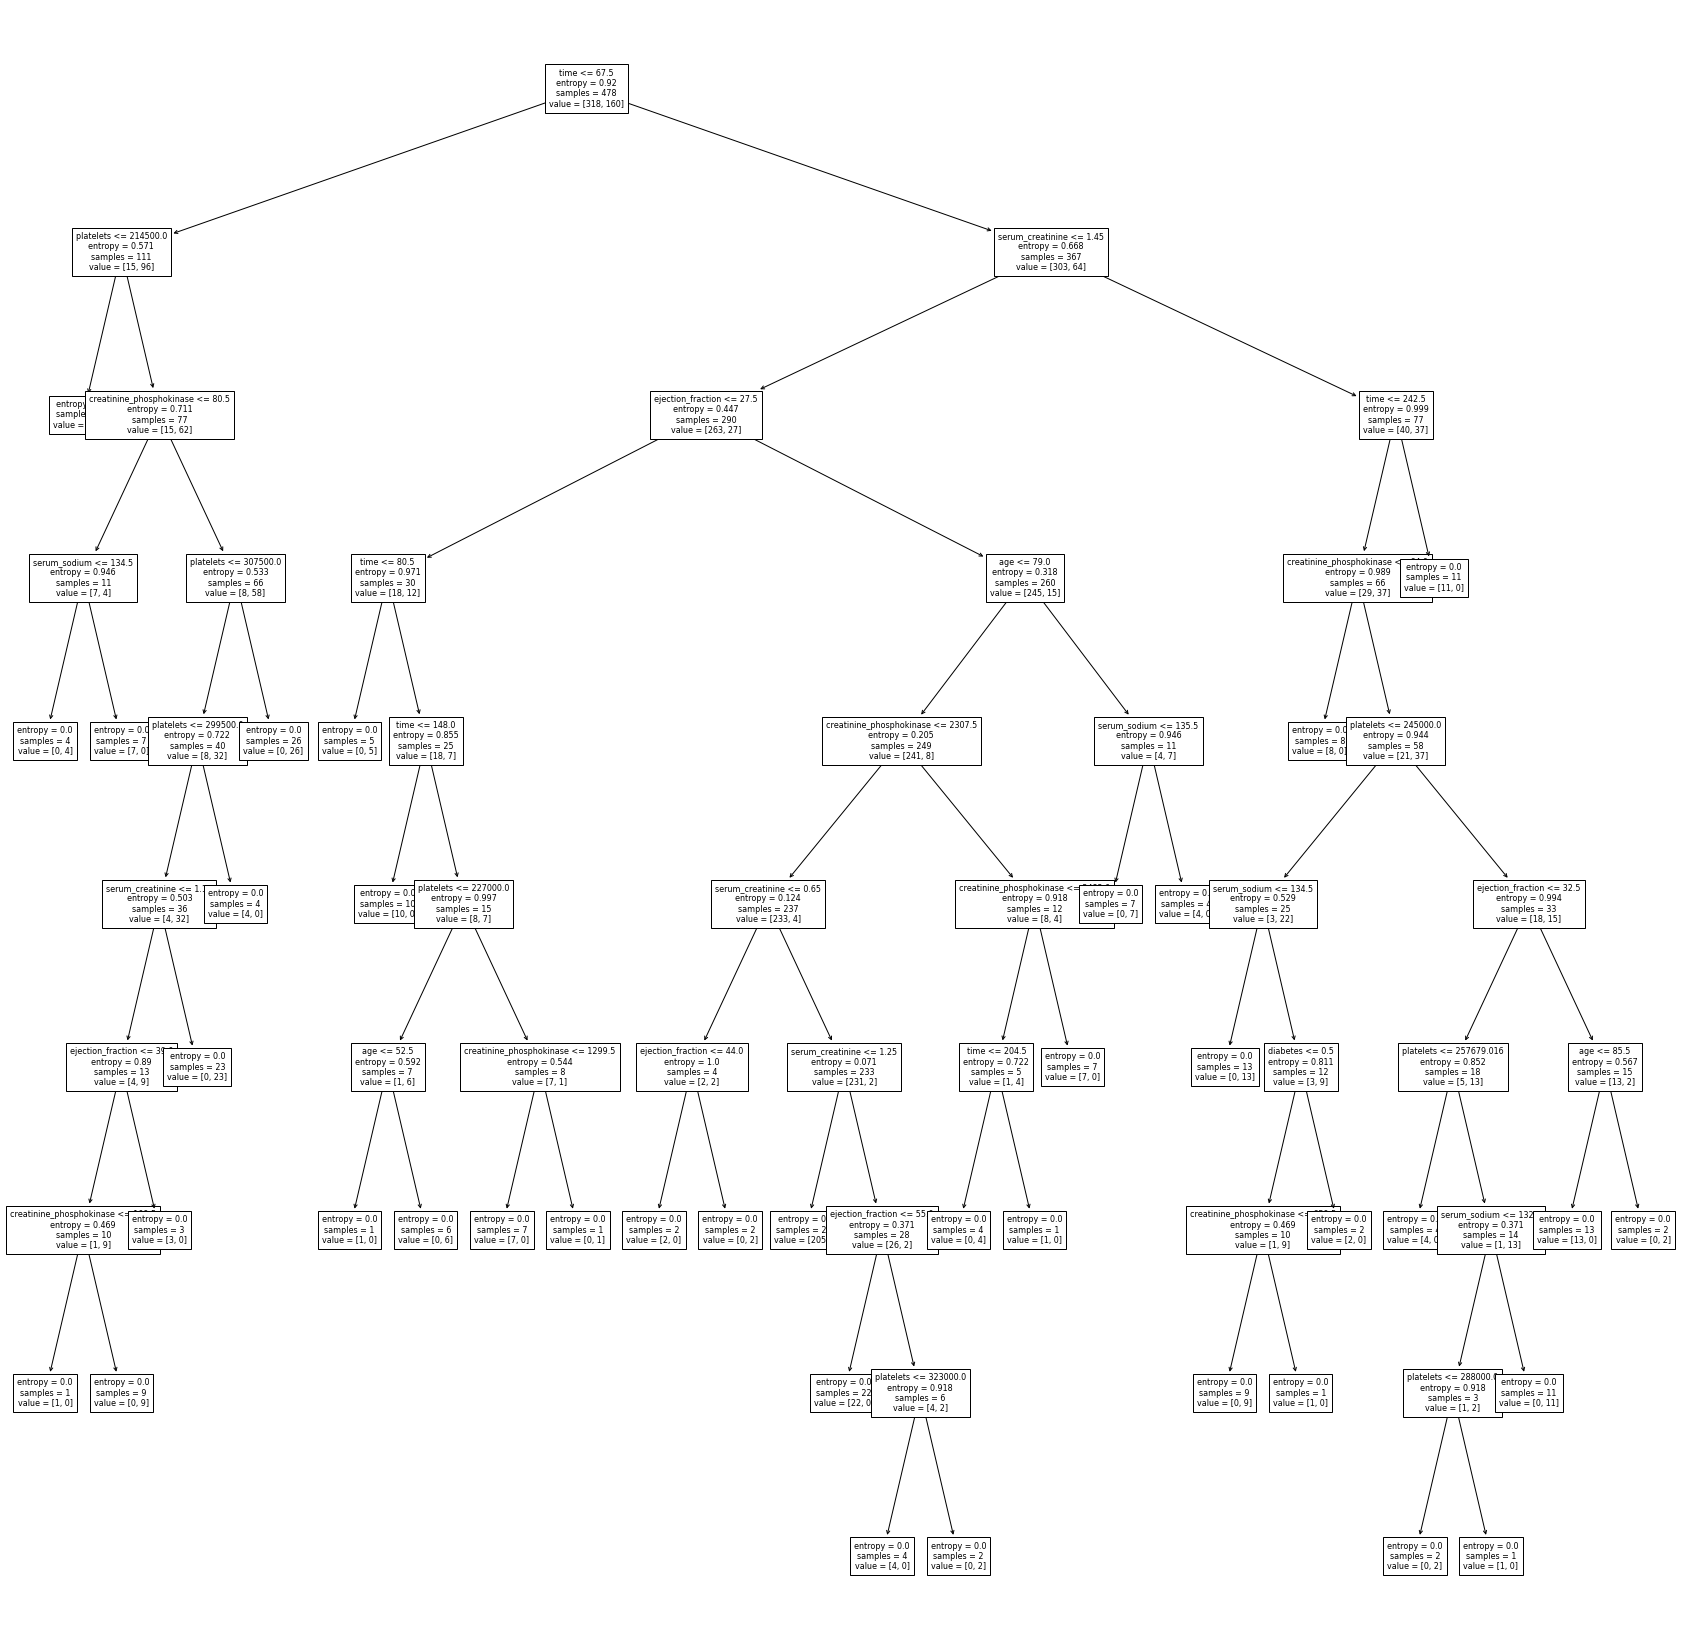

In [45]:

# Predicting the Test set results
y_pred = classifier.predict(x_test)
plt.figure(figsize=(30,30))
tree.plot_tree(classifier,feature_names=features,fontsize=8)
plt.savefig('tree_high_dpi', dpi=200)

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Figure size 432x288 with 0 Axes>

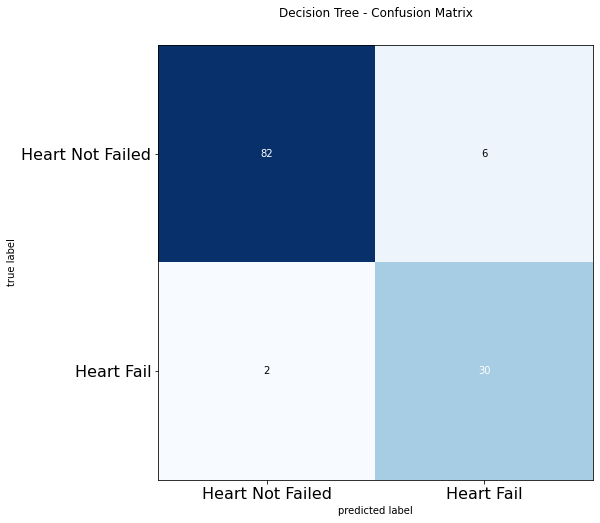

In [47]:
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [48]:
print("accuracy obtained : "+str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])))

accuracy obtained : 0.9333333333333333


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [50]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

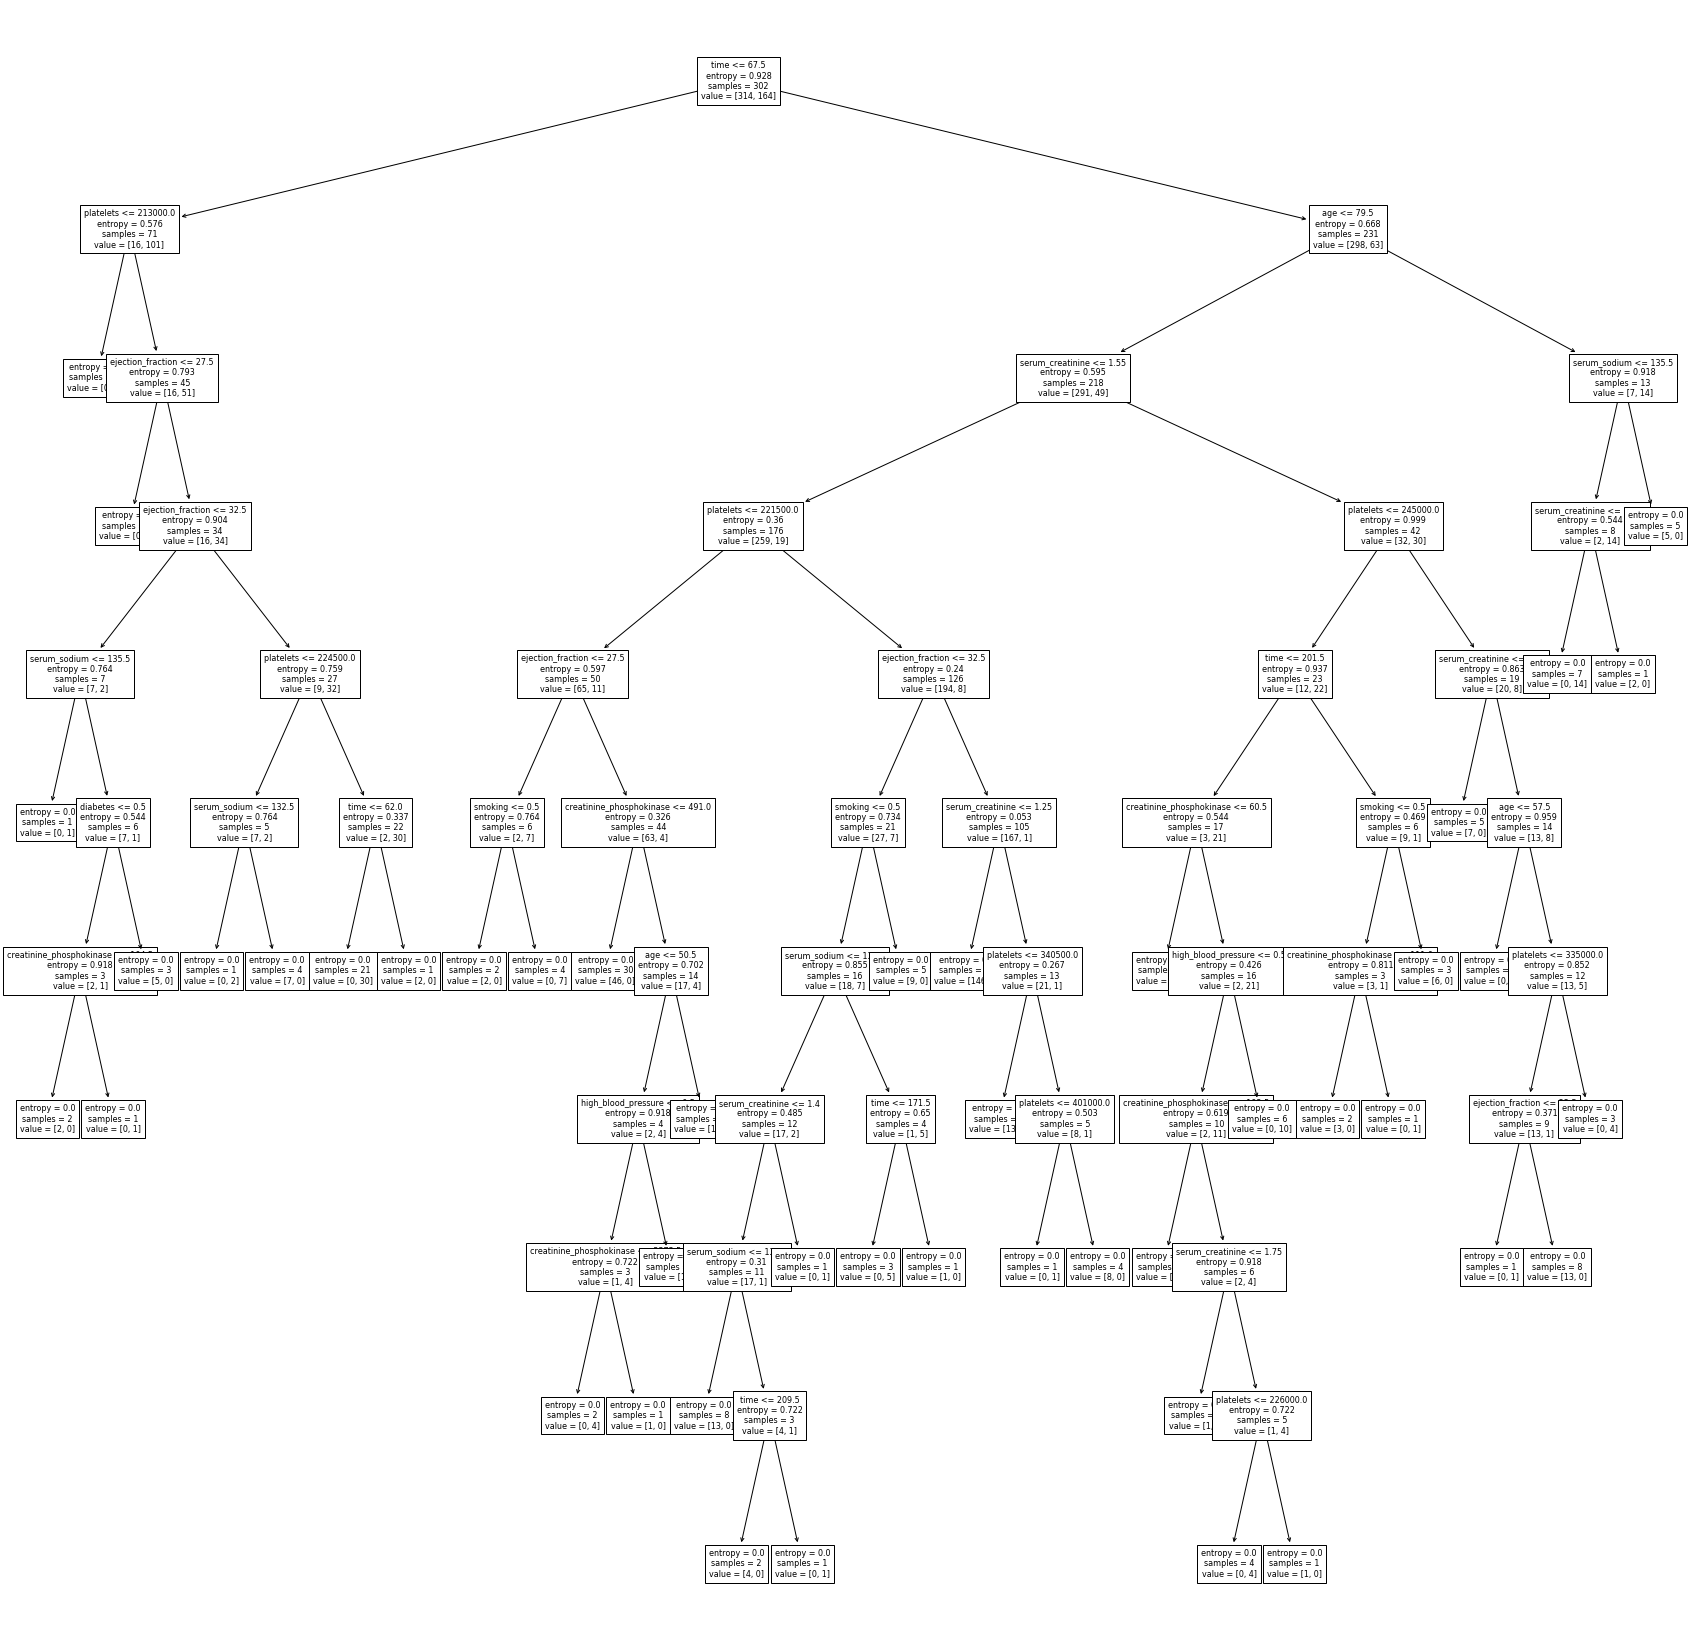

In [51]:
plt.figure(figsize=(30,30))
tree.plot_tree(classifier[0],feature_names=features,fontsize=8)
plt.savefig('tree_high_dpi', dpi=200)

In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Figure size 432x288 with 0 Axes>

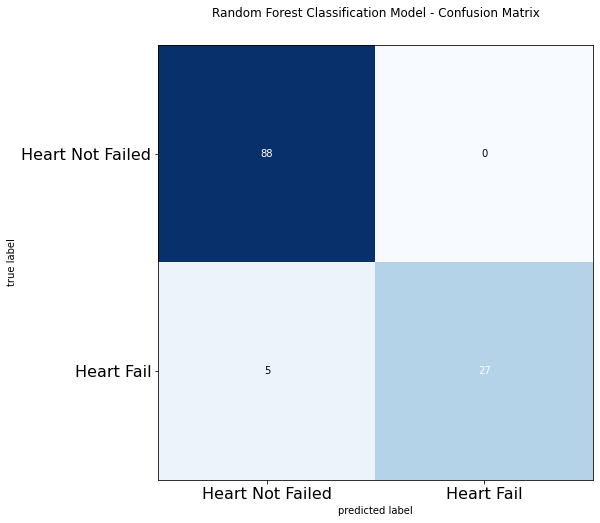

In [53]:
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Classification Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [54]:
print("accuracy obtained : "+str((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])))

accuracy obtained : 0.9583333333333334


In [55]:
from sklearn.tree import export_graphviz
export_graphviz(classifier[0],
                feature_names=features,
                filled=True,
                rounded=True)


'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="time <= 67.5\\nentropy = 0.928\\nsamples = 302\\nvalue = [314, 164]", fillcolor="#f3c3a0"] ;\n1 [label="platelets <= 213000.0\\nentropy = 0.576\\nsamples = 71\\nvalue = [16, 101]", fillcolor="#58ade9"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 26\\nvalue = [0, 50]", fillcolor="#399de5"] ;\n1 -> 2 ;\n3 [label="ejection_fraction <= 27.5\\nentropy = 0.793\\nsamples = 45\\nvalue = [16, 51]", fillcolor="#77bced"] ;\n1 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 11\\nvalue = [0, 17]", fillcolor="#399de5"] ;\n3 -> 4 ;\n5 [label="ejection_fraction <= 32.5\\nentropy = 0.904\\nsamples = 34\\nvalue = [16, 34]", fillcolor="#96cbf1"] ;\n3 -> 5 ;\n6 [label="serum_sodium <= 135.5\\nentropy = 0.764\\nsamples = 7\\nvalue = [7, 2]", fillcolor="#eca572"] ;\n5 -> 6 ;\n7 [label="entropy = 0.0\\nsamples = 1\\nv